In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime
import numpy as np
import os
from scipy import stats
from scipy.stats import ttest_ind
plt.style.use('fivethirtyeight')
# sns.set()
plt.rcParams['figure.figsize']= (12,12)

In [2]:
GRAPH = 'Results/Graphs'
TABLE = 'Results/Tables'
DATA = 'data/'

<h3>Choose Desired Sector</h3>

<h3> Correct/Drop Invalid TotalVacancy Value </h3>

In [218]:
df = pd.read_csv(os.path.join(DATA,'Dataset_v4.csv'))

In [34]:
industries = df.IndustryName.value_counts().index[:10].values  # Choosing Industries to Analysis
# df = df[df['IndustryName'].isin(cat)]
industries

array(['Information Technology (IT)', 'Others', 'Telecommunication',
       'Garments/ Textile', 'Education', 'NGO/Development',
       'Manufacturing (Heavy Industry)',
       'Bank/ Non-Bank Fin. Institution', 'Govt./ Semi-Govt./ Autonomous',
       'Electronics/ Consumer Durables'], dtype=object)

In [157]:
titles = df['ONET Title'].value_counts().index[:10].values
titles

array(['Software Developers', 'Web Developers',
       'Information Technology Project Managers',
       'Computer Systems Engineers/Architects',
       'Web and Digital Interface Designers',
       'Computer User Support Specialists',
       'Computer Occupations, All Other',
       'Business Intelligence Analysts', 'Project Management Specialists',
       'Computer Programmers'], dtype=object)

<h1> April 9 : Hypothesis Testing </h1>

<Analysizing Full Dataset>

<h1> Analysing Whole </h1>

In [239]:
def ttest_func(field):
    combos = [(2016,2017),(2017,2018),(2018,2019),(2019,2020),(2020,2021)]
    results = pd.DataFrame(index=industries,columns=[str(x) for x in combos])
    for industry in industries:
        for yr in combos:
            temp = df[df.IndustryName == industry]
            cat1 = temp[temp['Year'] == yr[0]]
            cat2 = temp[temp['Year'] == yr[1]]
            stat,p = ttest_ind(cat1[field],cat2[field],equal_var=False,alternative='less')
            results.loc[industry,str(yr)] = p < 0.1

    plot_df = df[df.IndustryName == industries[0]]
    # plot_df = plot_df.groupby(['IndustryName','Year'])['TotalVacancy'].sum().reset_index()
    sns.barplot(x='Year',y=field,data=plot_df,ci=95)
    plt.xticks(rotation=0,fontsize=22)
    plt.xlabel(None)
    plt.ylabel('Average number of female acceptance per post',fontsize=22)
    plt.title(f'Average number of female acceptance in IT Sector on Each Year',fontsize=22)
    plt.yticks(fontsize=22)
    plt.tight_layout()
    plt.tight_layout()
    plt.savefig('ttest_female.png',dpi=350)
    return results

,"(2016, 2017)","(2017, 2018)","(2018, 2019)","(2019, 2020)","(2020, 2021)"
Information Technology (IT),True,True,False,False,True
Others,False,False,False,False,False
Telecommunication,True,False,False,False,False
Garments/ Textile,False,False,True,False,False
Education,False,True,False,False,False
NGO/Development,False,False,False,False,False
Manufacturing (Heavy Industry),True,False,False,False,True
Bank/ Non-Bank Fin. Institution,True,False,False,True,False
Govt./ Semi-Govt./ Autonomous,False,False,False,False,True
Electronics/ Consumer Durables,True,False,False,True,False


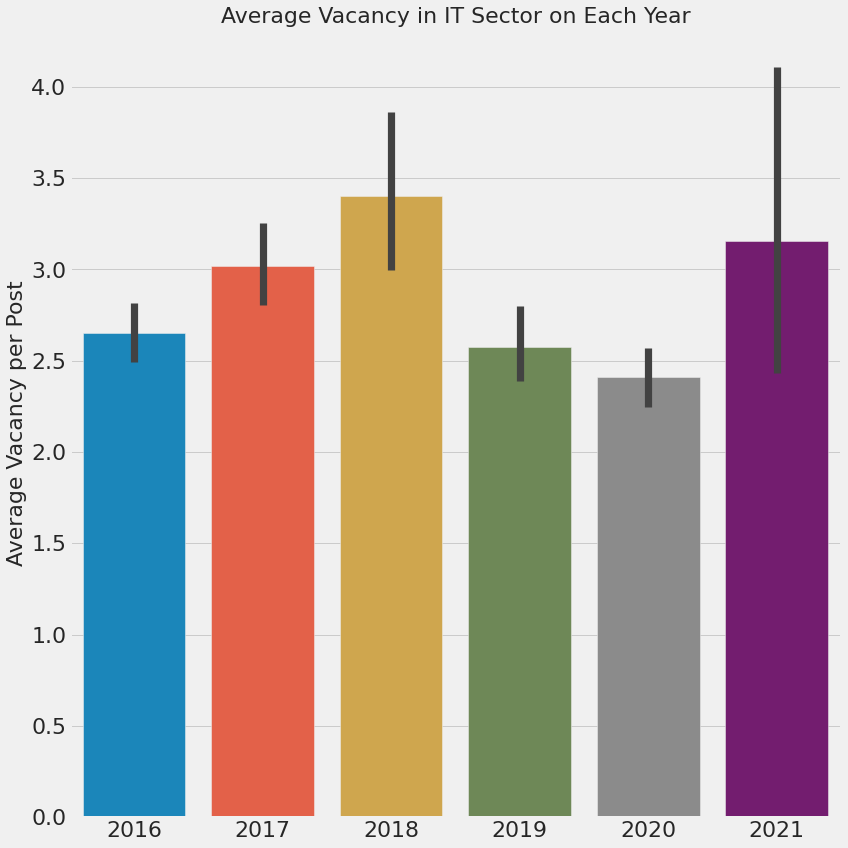

In [233]:
ttest_func('TotalVacancy')

,"(2016, 2017)","(2017, 2018)","(2018, 2019)","(2019, 2020)","(2020, 2021)"
Information Technology (IT),True,False,False,False,False
Others,False,False,False,False,False
Telecommunication,True,False,False,True,False
Garments/ Textile,True,False,False,False,False
Education,False,False,False,False,False
NGO/Development,False,True,False,False,False
Manufacturing (Heavy Industry),False,True,False,False,False
Bank/ Non-Bank Fin. Institution,False,True,False,False,False
Govt./ Semi-Govt./ Autonomous,True,False,False,False,False
Electronics/ Consumer Durables,True,False,False,False,False


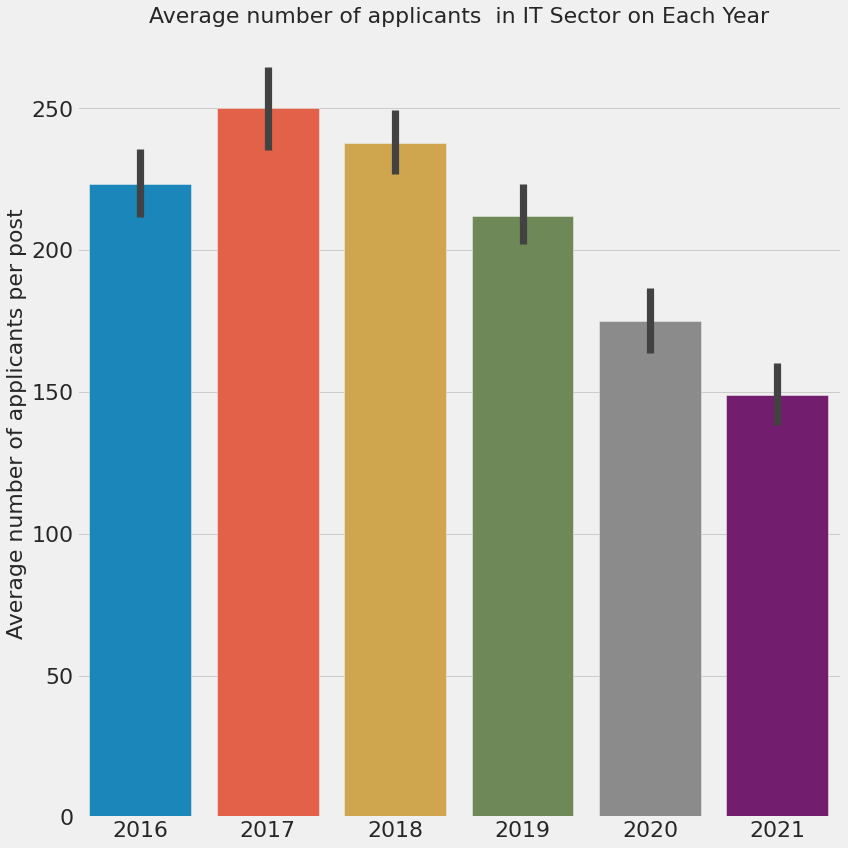

In [235]:
ttest_func('number_applicants')

,"(2016, 2017)","(2017, 2018)","(2018, 2019)","(2019, 2020)","(2020, 2021)"
Information Technology (IT),False,False,False,False,False
Others,False,False,False,False,False
Telecommunication,False,False,False,False,False
Garments/ Textile,False,False,False,True,False
Education,False,False,False,False,False
NGO/Development,True,False,False,True,False
Manufacturing (Heavy Industry),False,False,False,True,False
Bank/ Non-Bank Fin. Institution,False,False,False,False,False
Govt./ Semi-Govt./ Autonomous,True,False,False,False,False
Electronics/ Consumer Durables,False,False,False,False,False


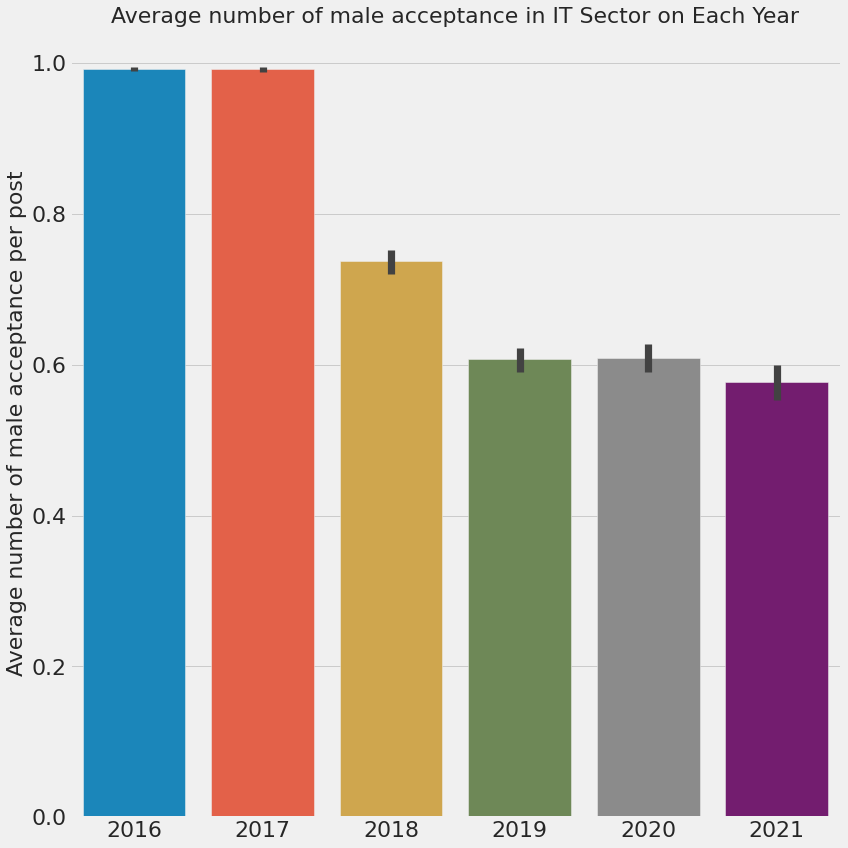

In [238]:
ttest_func('MaleGender')

,"(2016, 2017)","(2017, 2018)","(2018, 2019)","(2019, 2020)","(2020, 2021)"
Information Technology (IT),False,False,False,False,False
Others,False,False,False,False,False
Telecommunication,False,False,False,False,False
Garments/ Textile,False,False,False,False,False
Education,False,False,False,False,False
NGO/Development,False,False,False,True,False
Manufacturing (Heavy Industry),False,False,False,True,False
Bank/ Non-Bank Fin. Institution,False,False,False,False,False
Govt./ Semi-Govt./ Autonomous,True,False,False,False,False
Electronics/ Consumer Durables,False,False,False,False,False


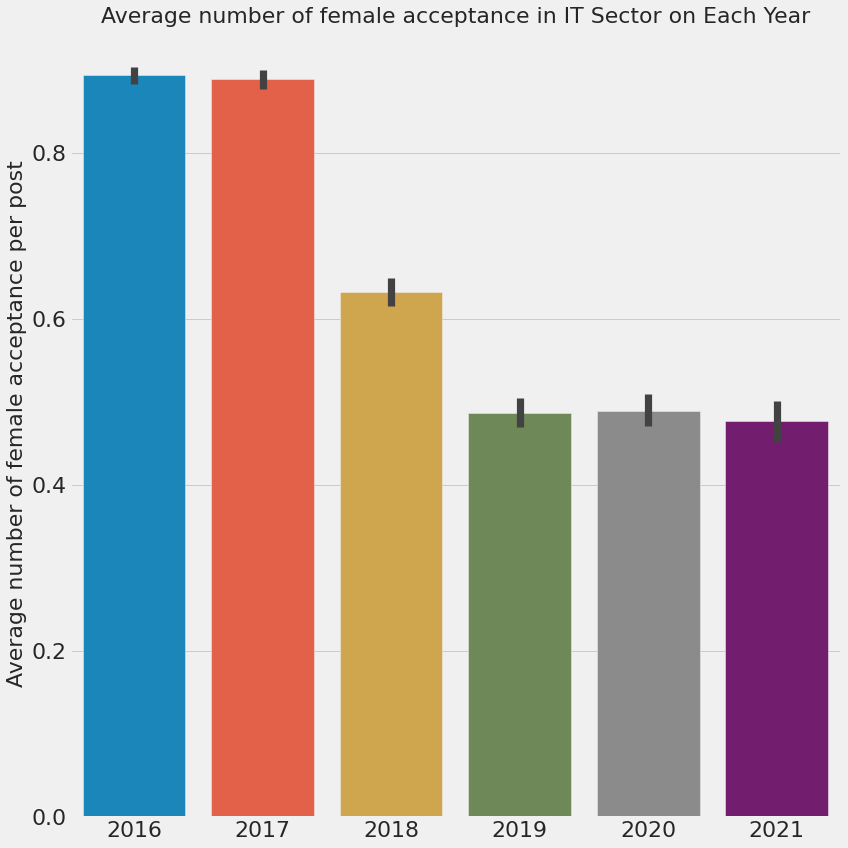

In [244]:
ttest_func('FemaleGender')

,"(2016, 2017)","(2017, 2018)","(2018, 2019)","(2019, 2020)","(2020, 2021)"
Information Technology (IT),False,False,False,False,False
Others,False,False,False,False,False
Telecommunication,False,False,False,False,False
Garments/ Textile,False,False,False,False,True
Education,False,False,False,False,False
NGO/Development,False,False,False,True,False
Manufacturing (Heavy Industry),False,False,True,False,False
Bank/ Non-Bank Fin. Institution,False,False,False,False,True
Govt./ Semi-Govt./ Autonomous,True,False,False,False,False
Electronics/ Consumer Durables,False,False,False,False,True


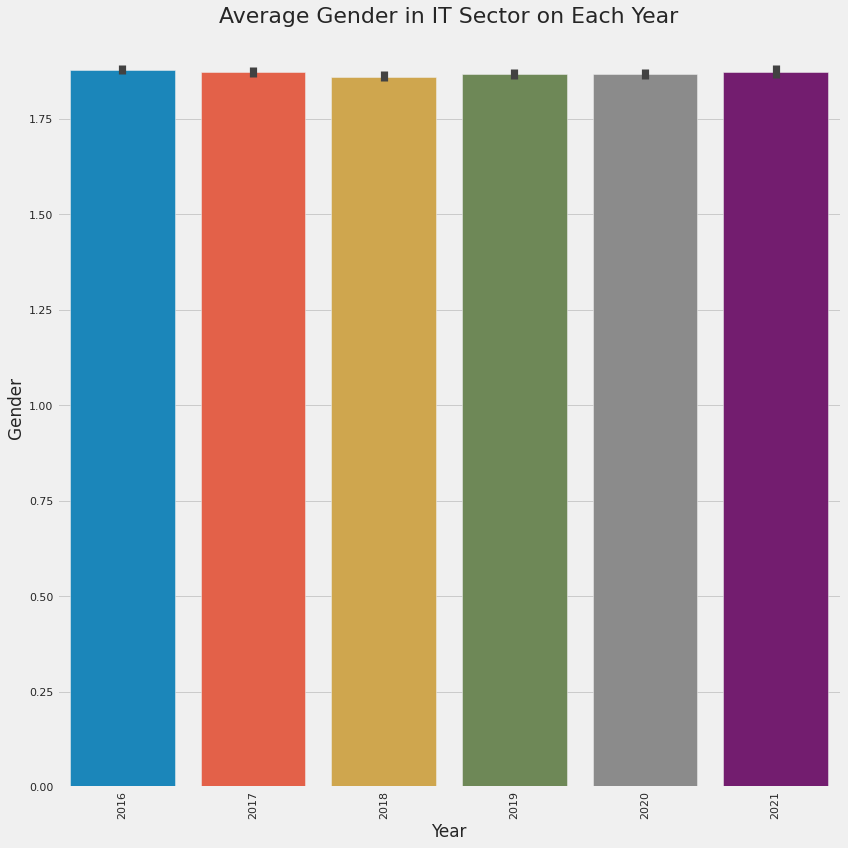

In [224]:
ttest_func('Gender')

In [247]:
def ttest_func_title(field):
    combos = [(2016,2017),(2017,2018),(2018,2019),(2019,2020),(2020,2021)]
    results = pd.DataFrame(index=titles,columns=[str(x) for x in combos])
    for title in titles:
        for yr in combos:
            temp = df[df['ONET Title'] == title]
#             temp = temp[temp['IndustryName'] == 'Bank/ Non-Bank Fin. Institution']
            cat1 = temp[temp['Year'] == yr[0]]
            cat2 = temp[temp['Year'] == yr[1]]
            stat,p = ttest_ind(cat1[field],cat2[field],equal_var=False,alternative='greater')
            results.loc[title,str(yr)] = p < 0.1
    plot_df = df[df['ONET Title'].isin(titles[0:2])]
    # plot_df = plot_df.groupby(['IndustryName','Year'])['TotalVacancy'].sum().reset_index()
    sns.barplot(x='ONET Title',y=field,hue='Year',data=plot_df,ci=95)
    plt.xticks(rotation=0,fontsize=22)
    plt.xlabel(None)
    plt.ylabel('Average number of applicants for Software Developers per post',fontsize=22)
    plt.title(f'Average number of applicants for Software Developers on Each Year',fontsize=22)
    plt.yticks(fontsize=22)
    plt.tight_layout()
    plt.tight_layout()
    plt.savefig('ttest_swe_app.png',dpi=350)


    return results

,"(2016, 2017)","(2017, 2018)","(2018, 2019)","(2019, 2020)","(2020, 2021)"
Software Developers,False,True,False,False,False
Web Developers,False,True,False,True,False
Information Technology Project Managers,False,False,True,False,False
Computer Systems Engineers/Architects,False,False,True,False,False
Web and Digital Interface Designers,False,False,False,True,False
Computer User Support Specialists,False,False,True,False,False
"Computer Occupations, All Other",False,False,False,False,False
Business Intelligence Analysts,False,False,True,False,False
Project Management Specialists,False,False,True,False,False
Computer Programmers,False,False,False,True,False


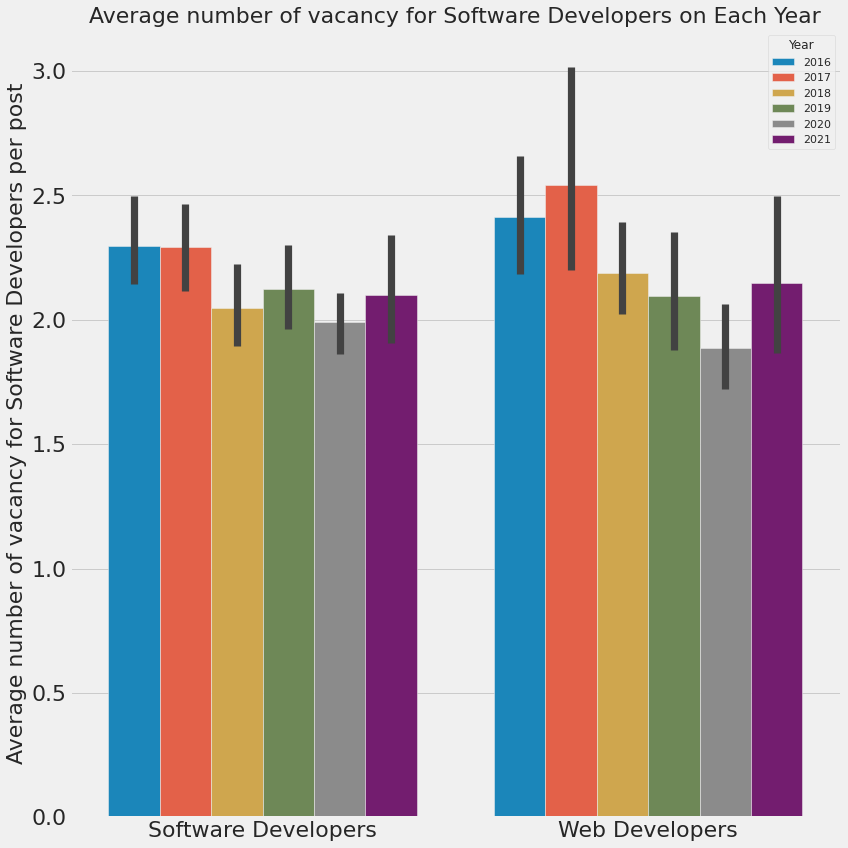

In [246]:
ttest_func_title('TotalVacancy')

,"(2016, 2017)","(2017, 2018)","(2018, 2019)","(2019, 2020)","(2020, 2021)"
Software Developers,False,False,True,True,True
Web Developers,False,False,True,True,True
Information Technology Project Managers,False,False,False,False,True
Computer Systems Engineers/Architects,False,True,True,False,False
Web and Digital Interface Designers,False,False,False,True,True
Computer User Support Specialists,False,False,True,True,False
"Computer Occupations, All Other",False,False,False,False,False
Business Intelligence Analysts,False,False,True,False,False
Project Management Specialists,False,False,False,False,False
Computer Programmers,False,False,False,True,False


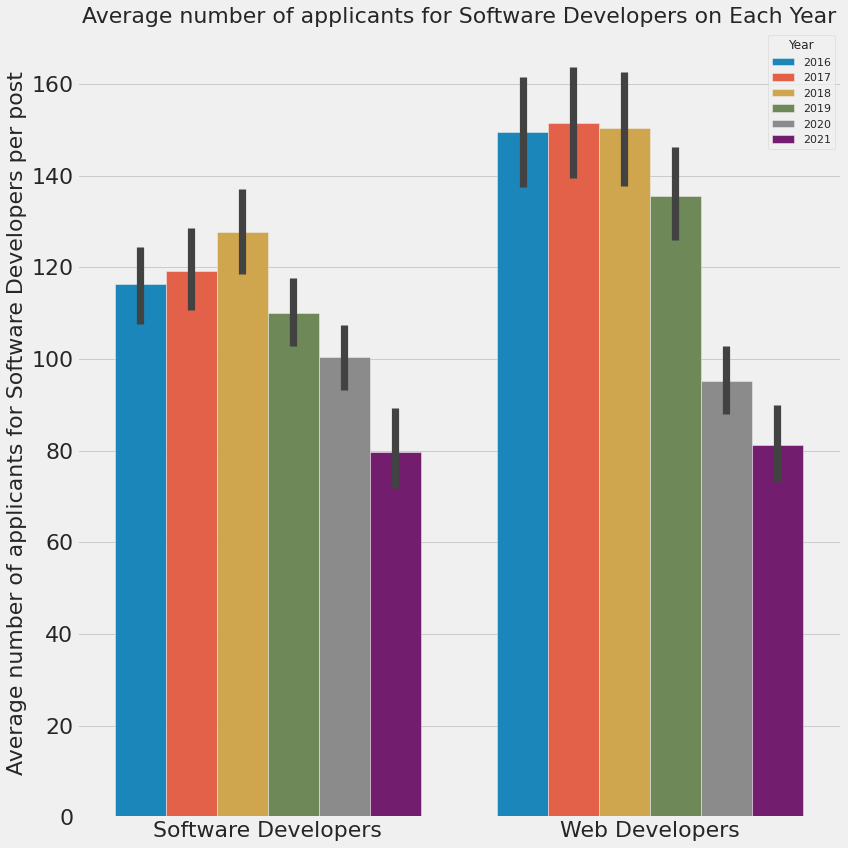

In [248]:
ttest_func_title('number_applicants')

,"(2016, 2017)","(2017, 2018)","(2018, 2019)","(2019, 2020)","(2020, 2021)"
Software Developers,True,True,True,False,False
Web Developers,False,True,True,False,False
Information Technology Project Managers,False,True,True,False,False
Computer Systems Engineers/Architects,False,True,True,True,False
Web and Digital Interface Designers,False,True,True,False,False
Computer User Support Specialists,False,True,True,False,False
"Computer Occupations, All Other",False,True,True,False,True
Business Intelligence Analysts,False,True,True,True,True
Project Management Specialists,False,True,True,False,True
Computer Programmers,True,True,True,False,False


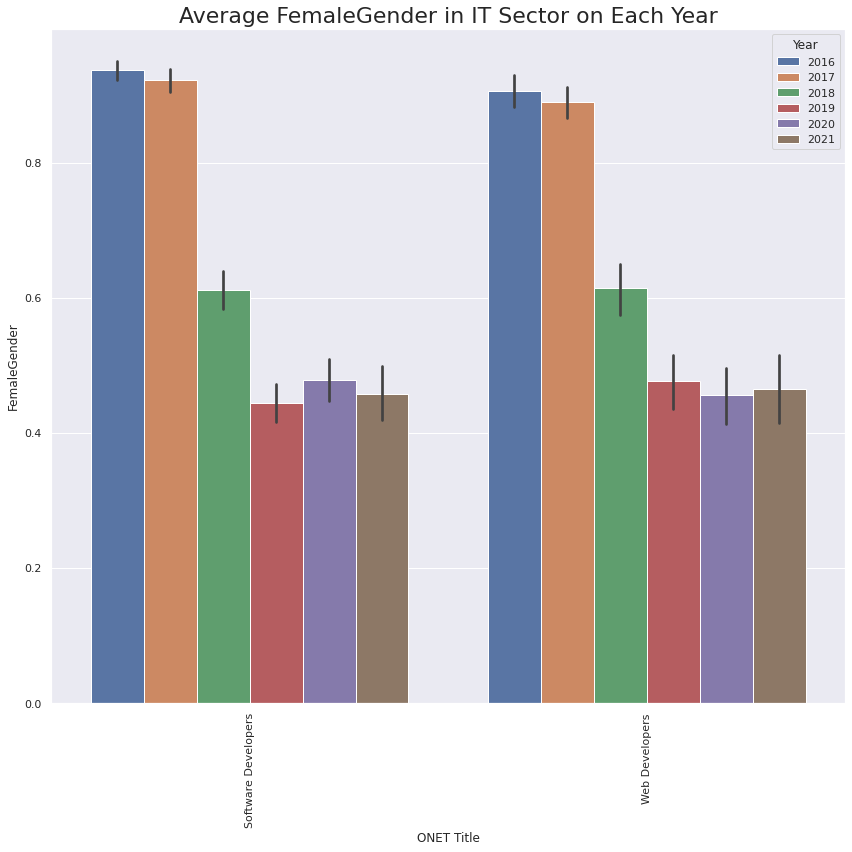

In [188]:
ttest_func_title('FemaleGender')

In [148]:
df['IndustryName'].value_counts()

Information Technology (IT)                                  16158
Others                                                        2060
Telecommunication                                             1429
Garments/ Textile                                             1378
Education                                                     1016
NGO/Development                                                978
Manufacturing (Heavy Industry)                                 785
Bank/ Non-Bank Fin. Institution                                714
Govt./ Semi-Govt./ Autonomous                                  712
Electronics/ Consumer Durables                                 469
Wholesale/ Retail/ Export-Import                               464
Media (Satellite/ Print/ Online)/ Advertising/ Event Mgt.      418
Pharmaceuticals                                                288
Architecture/ Engineering/ Construction                        261
Real Estate/ Development                                      

In [219]:
df['Gender'] = df['MaleGender'] + df['FemaleGender']
df['Gender'] = df['Gender'].apply(lambda x : 'Both male and female' if x == 2 else x)
df['Gender'] = df['Gender'].apply(lambda x : 'Not Specified' if x == 0 else x)
for i in range(len(df)):
    if df.loc[i,'Gender'] == 1:
        if df.loc[i,'MaleGender'] == 1:
            df.loc[i,'Gender'] = 'Male only'
        else:
            df.loc[i,'Gender'] = 'Female only'
            
df['Gender'].value_counts()


Both male and female    16889
Not Specified            7140
Male only                4068
Female only               219
Name: Gender, dtype: int64

In [220]:
df.loc[df['Gender'] == 'Both male and female','Gender'] = 2
df.loc[df['Gender'] == 'Not Specified','Gender'] = 2
df.loc[df['Gender'] == 'Male only','Gender'] = 1
df.loc[df['Gender'] == 'Female only','Gender'] = 0

In [221]:
df.groupby(['Year'])['Gender'].value_counts()

Year  Gender
2016  2         4339
      1          660
      0           39
2017  2         4474
      1          762
      0           39
2018  2         4462
      1          807
      0           54
2019  2         4739
      1          791
      0           40
2020  2         3572
      1          647
      0           26
2021  2         2443
      1          401
      0           21
Name: Gender, dtype: int64